# Descriptive Statistics

Descriptive statistics (or summative statistics) describes and summarize the features of the data

## Continuous Distributions

#### PDF (probability density function)
$$ Pr[a \leq X \leq b] = \int_a^b f(x)dx $$ 
$$ - \infty \leq x \leq \infty, 0 \leq Pr \leq 1$$


#### CDF (cumulative distribution function)
$$ F(x) = \int^x_{-\infty} f(u) du $$
$$ - \infty \leq x \leq \infty, 0 \leq F(x) \leq 1$$


#### Quantile (percentile)
$$ Q(x) = F^{-1}(x) $$
$$ 0 \leq x \leq 1, - \infty \leq Q(x) \leq \infty$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'PPF')

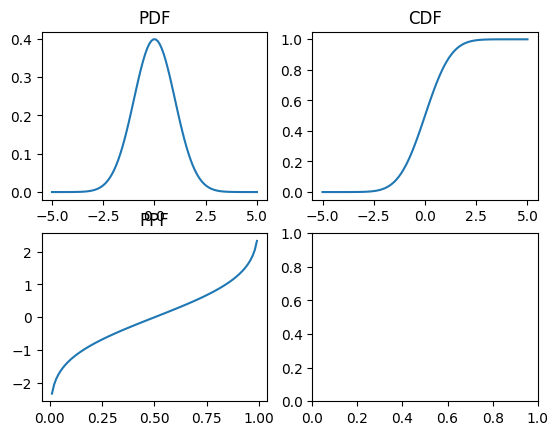

In [2]:
# gaussian
from scipy.stats import norm
rv = norm()
fig, ax =  plt.subplots(2,2)


# PDF
x = np.linspace(-5, 5, 100)
ax[0][0].plot(x, rv.pdf(x))
ax[0][0].set_title('PDF')


# CDF
ax[0][1].plot(x, rv.cdf(x))
ax[0][1].set_title('CDF')


# PPF
x = np.linspace(0, 1, 100)
ax[1][0].plot(x, rv.ppf(x))
ax[1][0].set_title('PPF')

# ignore the bottom right plot, it's empty as normal

## Common distributions

#### Gaussian
$$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} exp\left(-\frac{1}{2} \left(\frac{x-\mu}{\sigma}\right)^2 \right) $$


#### Poisson
$$ f(k) = e^{-\mu} \frac{\mu^k}{k!} $$


#### $\chi$ squared
$$ f(x, k) = \frac{1}{2^{k/2}\Gamma(k/2)} x^{k/2-1} exp(-x/2) $$


#### Cauchy
$$ f(x) = \frac{1}{\pi(1+x^2)} $$

Text(0.5, 1.0, 'Cauchy')

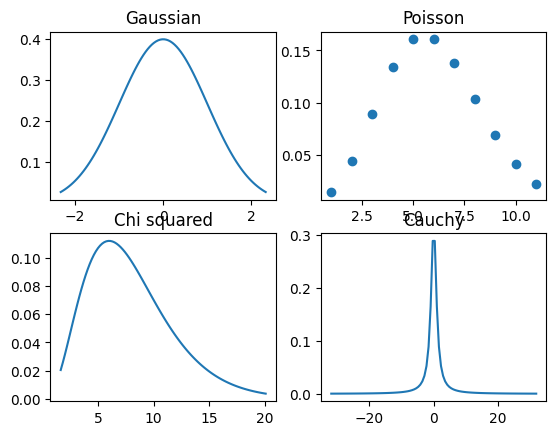

In [3]:
from scipy.stats import norm, poisson, chi2, cauchy
fig, ax =  plt.subplots(2,2)

# gaussian
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
rv = norm()
ax[0][0].plot(x, rv.pdf(x))
ax[0][0].set_title('Gaussian')


# possian
mu = 6
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
rv = poisson(mu)
ax[0][1].plot(x, rv.pmf(x), 'o')
ax[0][1].set_title('Poisson')


# chi2
df = 8
x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 100)
rv = chi2(df)
ax[1][0].plot(x, rv.pdf(x))
ax[1][0].set_title('Chi squared')


# cauchy
x = np.linspace(cauchy.ppf(0.01), cauchy.ppf(0.99), 100)
rv = cauchy()
ax[1][1].plot(x, rv.pdf(x))
ax[1][1].set_title('Cauchy')


## Summary Measures


#### 1D
$$\text{Mean} : \mu= \bar{x} = \int x P(x) dx = \frac{\displaystyle\sum_{i=1}^{N}x_{i}}{N}$$
$$\text{Variance} (\text{standard deviation}^2): \sigma^2 = \int (x-\mu)^2 P(x) dx = \frac{\displaystyle\sum_{i=1}^{N} (x_{i} -\bar{x})^{2}}{N}$$
$$\text{Standard error}=\text{SD of means}\approx \frac{\sigma}{\sqrt{N}} $$


#### 2D
$$\text{Covariance} : cov_{x,y} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{N-1}$$
$$\text{Correlation} : r_{x,y} =  \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2} \sqrt{\sum(y_i - \bar{y})^2}} = \frac{cov_{x,y}}{\sigma_x \sigma_y}$$

#### mean and std

In [3]:
a = [11, 21, 34, 22, 27, 11, 23, 21]
print(np.mean(a))
print(np.std(a))

21.25
7.1545440106270926


#### percentile

In [6]:
from scipy.stats import percentileofscore
grades = [50,50,46,95,50,5,57]
print(percentileofscore(grades, 100))

100.0


#### covariance matrix

In [33]:
x = [1.23, 2.12, 3.34, 4.5]
y = [2.56, 2.89, 3.76, 3.95]
 
# find out covariance with respect  columns
cov_mat = np.stack((x, y), axis = 0)

print(cov_mat)
print(cov_mat.shape)

print(np.cov(cov_mat))

[[1.23 2.12 3.34 4.5 ]
 [2.56 2.89 3.76 3.95]]
(2, 4)
[[2.03629167 0.9313    ]
 [0.9313     0.4498    ]]


#### correlation

In [7]:
from scipy.stats import pearsonr
res = pearsonr([1, 2, 3, 4, 5], [10, 9, 2.5, 6, 4])
print(res) # look at the "statistic=XXXXX"

PearsonRResult(statistic=-0.7426106572325059, pvalue=0.15055580885344538)


# Sampling

first 20 elements in norm.rvs
[ 0.81761939  1.20981405  0.15053942  0.45895182  1.11057577 -0.77688368
 -0.62417974 -0.60688074 -0.05680199 -1.91016326  0.59335847 -2.46375405
 -0.5583111  -0.13217359  0.34542487  0.69879214 -1.30266387 -0.86157816
 -1.30833777  1.87134873]


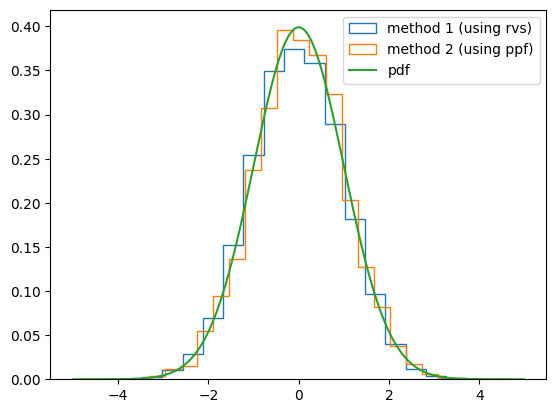

In [13]:
from random import random
from scipy.stats import norm

# Model parameters
mean = 0
std = 1
n_bins = 20


# Method 1: use rvs
r = norm.rvs(size=6000)

print('first 20 elements in norm.rvs')
print(r[:20])


# Method 2: use ppf
xx = []
yy = []
for _ in range(2000):
    x = random()  # between 0,1
    y = norm.ppf(x, loc=mean, scale=std)
    xx.append(x)
    yy.append(y)


# Draw gaussian distribution for confirmation
norm_xx = np.arange(-5, 5, 0.01)
norm_yy = norm.pdf(norm_xx, loc=mean, scale=std)


# Set density=True to normalize the histogram
plt.hist(r, bins=n_bins, density=True, label="method 1 (using rvs)", histtype="step")
plt.hist(yy, bins=n_bins, density=True, label="method 2 (using ppf)", histtype="step")
plt.plot(norm_xx, norm_yy, '-', label="pdf")
plt.legend()
plt.show()

# Linear regression


### R-squared
It measure how good the line fits with the data

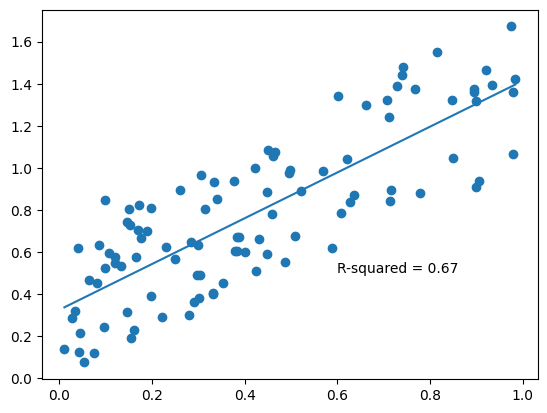

In [13]:
import scipy

xx = np.random.rand(100)             # Random Data
yy = xx + np.random.rand(100)*0.76   # Random Data


slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(xx, yy)
r_squared = r_value **2


plt.scatter(xx, yy)
plt.plot(np.unique(xx), np.poly1d(np.polyfit(xx, yy, 1))(np.unique(xx)))
plt.text(0.6, 0.5, 'R-squared = %0.2f' % r_squared)
plt.show()

# Law of large numbers

#### More is always better!

In [19]:
from random import random
from scipy.stats import norm


# loc (or mu) is the central of gaussian, size is the sample size
mu = 7
size = 4
gau_array = norm.rvs(loc=mu, size=size)
avg = np.mean(gau_array)
print(f'sample size: {size}')
print(f'sample mean: {avg:.5f}')
print(f'population mean: {mu}')

sample size: 4
sample mean: 6.91580
population mean: 7


# Central limit theorem

#### everything looks like gaussian if $N \rightarrow \infty$

Text(0, 0.5, 'Count')

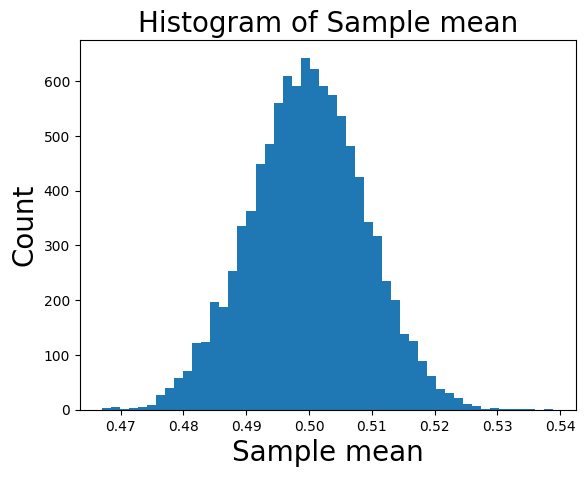

In [32]:
# set a large number
import numpy as np
population_size = 1000000 # 1 million points
population = np.random.rand(1000000)


number_of_samples = 10000
sample_means = np.random.rand(number_of_samples)
sample_size = 1000 # the size "n" in the figure above, play around this number

c = np.random.rand(number_of_samples)
for i in range(0, number_of_samples):
    c = np.random.randint(1, population_size, sample_size)
    sample_means[i] = population[c].mean()


plt.hist(sample_means, bins=50)
plt.title('Histogram of Sample mean', fontsize=20)
plt.xlabel('Sample mean', fontsize=20)
plt.ylabel('Count', fontsize=20)